In [25]:
import pandas as pd

In [62]:
# Cargar los archivos en DataFrames
file_libro = "app_libro.csv"
file_customuser = "app_customuser.csv"
file_compra = "app_compra.csv"


In [27]:
libro_df = pd.read_csv(file_libro)
customuser_df = pd.read_csv(file_customuser)
compra_df = pd.read_csv(file_compra)

In [28]:
# Unir app_customuser con app_compra en cliente_id = id
compra_usuario = compra_df.merge(
    customuser_df[['id', 'first_name', 'last_name']],
    left_on="cliente_id",
    right_on="id",
    suffixes=("_compra", "_usuario")
)

In [71]:
# Seleccionar columnas relevantes para claridad
compra_usuario = compra_usuario[[
    'cliente_id', 'producto_id', 'cantidad', 'fecha_compra'
]].copy()
compra_usuario['fecha_compra'] = pd.to_datetime(compra_usuario['fecha_compra'])
compra_usuario['año_compra'] = compra_usuario['fecha_compra'].dt.year
compra_usuario['mes_compra'] = compra_usuario['fecha_compra'].dt.month
compra_usuario['dia_compra'] = compra_usuario['fecha_compra'].dt.day


In [70]:
# Mostrar las primeras filas
print("Vista previa de los datos:")
print(compra_usuario.head())

Vista previa de los datos:
   cliente_id   first_name last_name  producto_id  cantidad  \
0         413      aasdasd   aasdasd           23         2   
1         417      Bastian  chamblas           28         2   
2         421        julio    tantas           31         1   
3         422  Jose Agurto     mamam           30         3   
4         419         jose    agurto           31         2   

         fecha_compra  año_compra  mes_compra  dia_compra  
0 2023-11-02 22:46:22        2023          11           2  
1 2023-11-04 22:47:39        2023          11           4  
2 2023-11-15 22:49:27        2023          11          15  
3 2023-11-18 22:49:59        2023          11          18  
4 2023-11-25 22:51:16        2023          11          25  


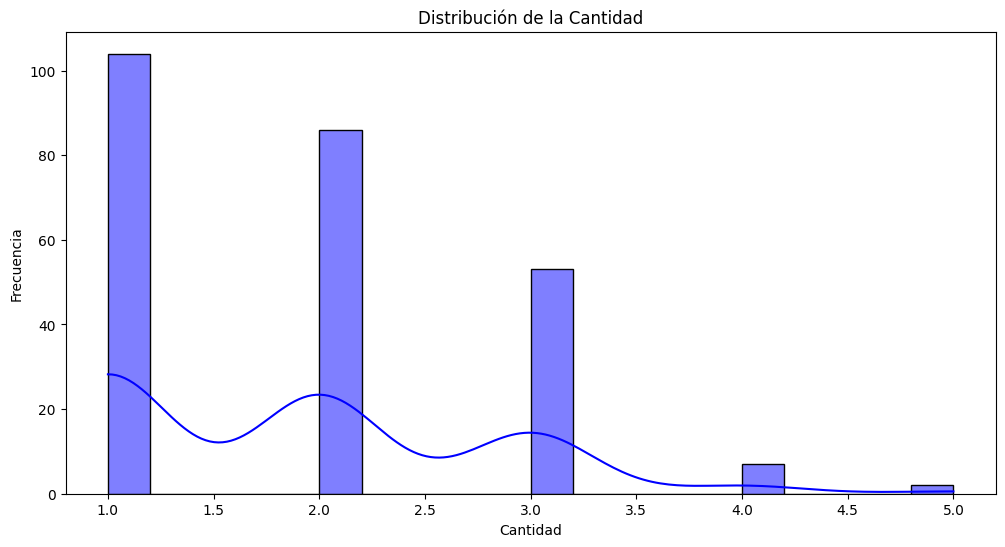

In [72]:
# Gráficos de distribución
plt.figure(figsize=(12, 6))
sns.histplot(compra_usuario['cantidad'], kde=True, bins=20, color='blue')
plt.title('Distribución de la Cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()


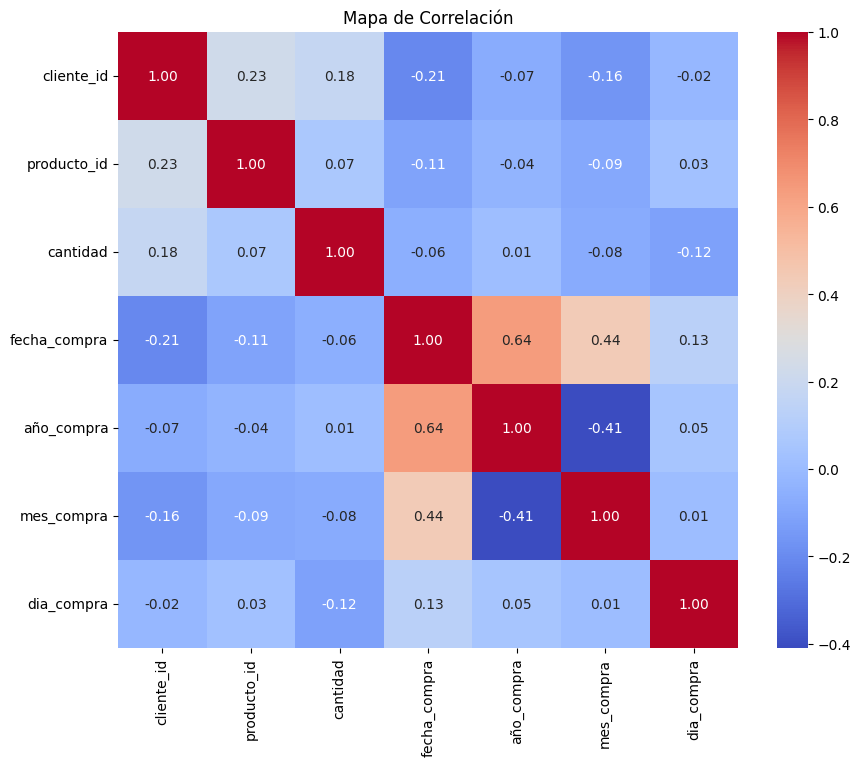

In [73]:
# Correlación entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(compra_usuario.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación')
plt.show()


In [31]:
# Total de compras por cliente
total_compras_por_cliente = compra_usuario.groupby(['first_name', 'last_name'])['cantidad'].sum().reset_index()
total_compras_por_cliente.rename(columns={'cantidad': 'Total Comprado'}, inplace=True)

In [32]:

# Productos más comprados
productos_populares = compra_df.groupby('producto_id')['cantidad'].sum().reset_index()
productos_populares = productos_populares.merge(libro_df[['id', 'nom_libro']], left_on='producto_id', right_on='id')
productos_populares = productos_populares[['nom_libro', 'cantidad']].sort_values(by='cantidad', ascending=False)


In [33]:
# Frecuencia de compra por cliente
frecuencia_compra = compra_df.groupby('cliente_id').size().reset_index(name='Frecuencia')
frecuencia_compra = frecuencia_compra.merge(customuser_df[['id', 'first_name', 'last_name']], left_on='cliente_id', right_on='id')
frecuencia_compra = frecuencia_compra[['first_name', 'last_name', 'Frecuencia']]

In [34]:
# Ver detalle de compras por cliente
detalle_compras = compra_usuario.merge(
    libro_df[['id', 'nom_libro', 'precio']],
    left_on="producto_id",
    right_on="id",
    suffixes=("", "_libro")
)
detalle_compras = detalle_compras[['first_name', 'last_name', 'nom_libro', 'cantidad', 'precio', 'fecha_compra']]

In [35]:
# Calcular gasto total por cliente
detalle_compras['Total Gasto'] = detalle_compras['cantidad'] * detalle_compras['precio']
gasto_por_cliente = detalle_compras.groupby(['first_name', 'last_name'])['Total Gasto'].sum().reset_index()

In [36]:
import matplotlib.pyplot as plt

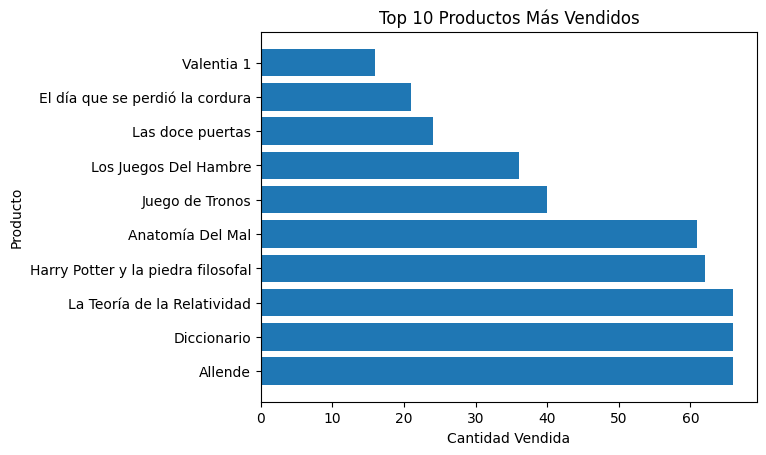

In [37]:
# Top 10 productos más vendidos
top_productos = productos_populares.head(10)
plt.barh(top_productos['nom_libro'], top_productos['cantidad'])
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.title('Top 10 Productos Más Vendidos')
plt.show()

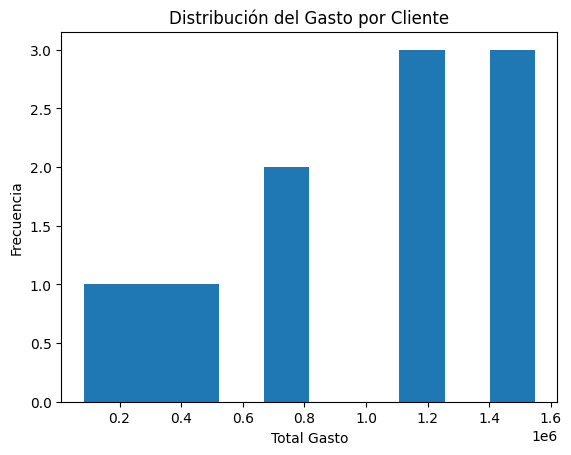

In [38]:
# Distribución del gasto por cliente
plt.hist(gasto_por_cliente['Total Gasto'], bins=10)
plt.xlabel('Total Gasto')
plt.ylabel('Frecuencia')
plt.title('Distribución del Gasto por Cliente')
plt.show()

In [39]:
# Librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# Cargar datos (asegúrate de tener tus datos limpios y listos)
# Por ejemplo, usando app_compra y app_customuser para predecir el total de gasto

# Creamos una variable objetivo (por ejemplo, 'Total Gasto') y las características relevantes
X = detalle_compras[['cantidad', 'precio']]  # Características
y = detalle_compras['Total Gasto']  # Variable objetivo


In [77]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Entrenamos el modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [43]:
# Predicciones
y_pred = reg_model.predict(X_test)


In [44]:
# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [45]:
print(f"Error Cuadrático Medio: {mse}")
print(f"R^2 Score: {r2}")


Error Cuadrático Medio: 92063806.66109985
R^2 Score: 0.9122415989029583


In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg_model, X, y, cv=5, scoring='r2')
print(f"R^2 promedio con validación cruzada: {scores.mean()}")

R^2 promedio con validación cruzada: 0.8857088063487707


In [47]:
coeficientes = pd.DataFrame({'Característica': X.columns, 'Coeficiente': reg_model.coef_})
print(coeficientes)

  Característica   Coeficiente
0       cantidad  21937.519395
1         precio      1.882508


In [63]:
# Convertir fecha a formato datetime y extraer características útiles
compra_usuario['fecha_compra'] = pd.to_datetime(compra_usuario['fecha_compra'])
compra_usuario['año_compra'] = compra_usuario['fecha_compra'].dt.year
compra_usuario['mes_compra'] = compra_usuario['fecha_compra'].dt.month
compra_usuario['dia_compra'] = compra_usuario['fecha_compra'].dt.day

In [64]:
X = compra_usuario[['producto_id', 'año_compra', 'mes_compra', 'dia_compra']]
y = compra_usuario['cantidad']

In [79]:
# Modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)



In [80]:

# Modelo de Árbol de Decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [81]:
# Evaluación de los modelos
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

In [82]:

print(f"Regresión Lineal - MSE: {mse_linear}, R²: {r2_linear}")
print(f"Árbol de Decisión - MSE: {mse_tree}, R²: {r2_tree}")

Regresión Lineal - MSE: 92063806.66109985, R²: 0.9122415989029583
Árbol de Decisión - MSE: 1901568.6274509805, R²: 0.9981873590895964


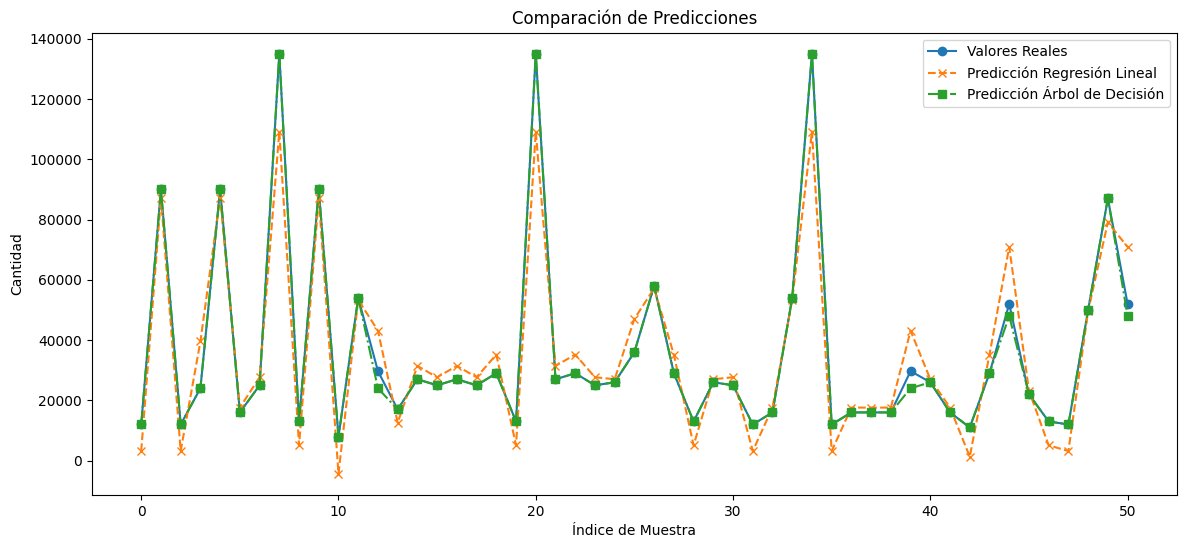

In [83]:
# Visualización de predicciones vs valores reales
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label="Valores Reales", linestyle='-', marker='o')
plt.plot(y_pred_linear, label="Predicción Regresión Lineal", linestyle='--', marker='x')
plt.plot(y_pred_tree, label="Predicción Árbol de Decisión", linestyle='-.', marker='s')
plt.title('Comparación de Predicciones')
plt.xlabel('Índice de Muestra')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

<ipython-input-84-b1dec66aea18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia, y=X.columns, palette='viridis')


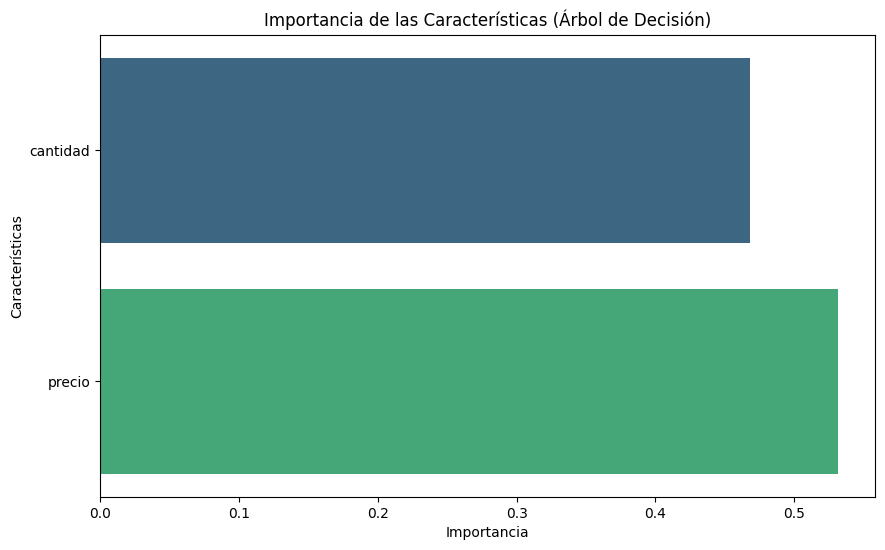

In [84]:
# Importancia de características del Árbol de Decisión
importancia = tree_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importancia, y=X.columns, palette='viridis')
plt.title('Importancia de las Características (Árbol de Decisión)')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [86]:
from sklearn.tree import plot_tree


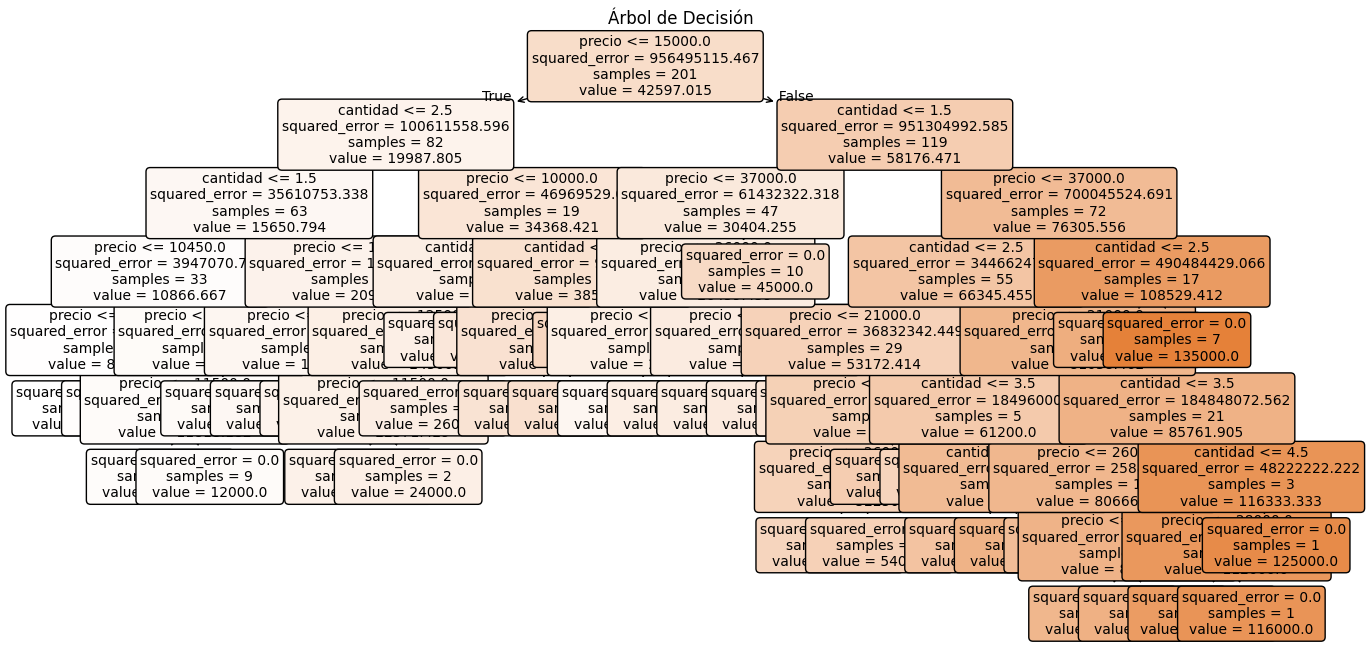

In [87]:
# Visualización del árbol
plt.figure(figsize=(16, 8))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión")
plt.show()

In [99]:
# Calcular errores absolutos
error_abs_linear = np.abs(y_test - y_pred_linear)
error_abs_tree = np.abs(y_test - y_pred_tree)

In [100]:
promedio_error_linear = np.mean(error_abs_linear)
promedio_error_tree = np.mean(error_abs_tree)

print("Promedio de Errores Absolutos por Modelo:")
print(f"- Regresión Lineal: {promedio_error_linear:.2f}")
print(f"- Árbol de Decisión: {promedio_error_tree:.2f}")

Promedio de Errores Absolutos por Modelo:
- Regresión Lineal: 6956.57
- Árbol de Decisión: 380.39


<ipython-input-90-0f9c6d6a7055>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


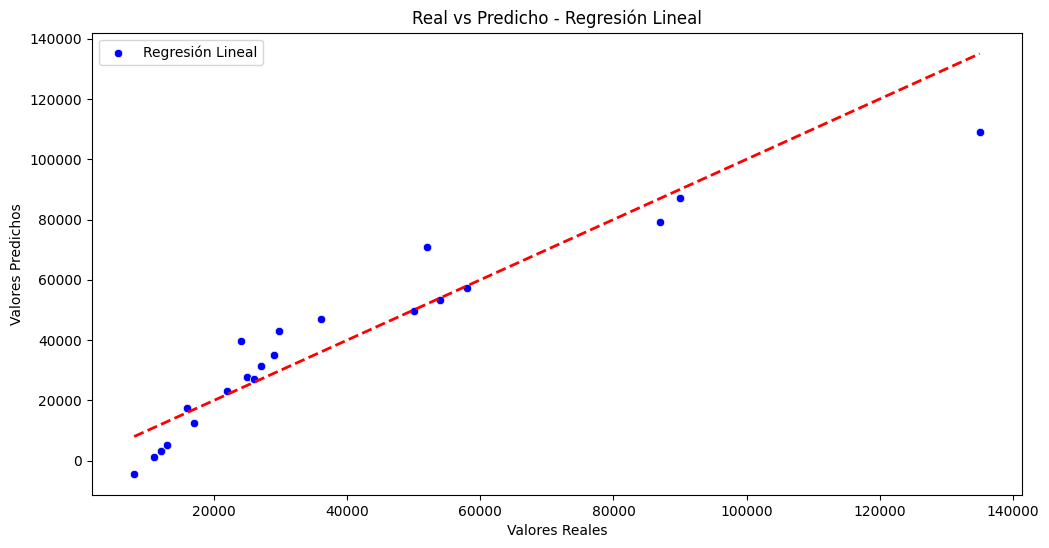

In [90]:
# Gráfico de dispersión (Real vs Predicho) - Regresión Lineal
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_linear, color='blue', label='Regresión Lineal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Real vs Predicho - Regresión Lineal')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()


<ipython-input-91-45d2632311ff>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


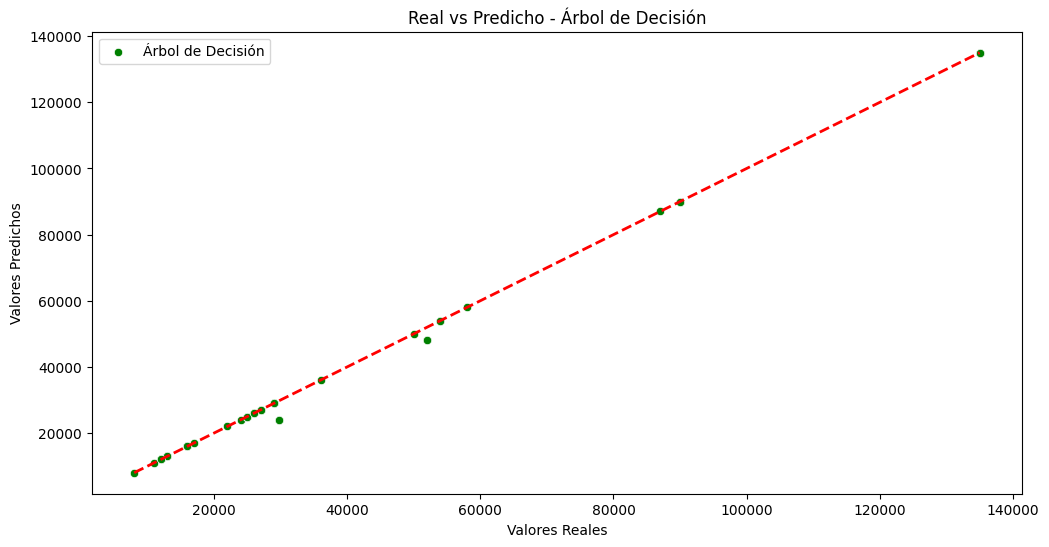

In [91]:
# Gráfico de dispersión (Real vs Predicho) - Árbol de Decisión
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, color='green', label='Árbol de Decisión')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Real vs Predicho - Árbol de Decisión')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()